In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
x_train[0][5]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
         0,   0], dtype=uint8)

## Validation Set

In [5]:
x_val, x_train = x_train[:5000] / 255.0, x_train[5000:] / 255.0
y_val, y_train = y_train[:5000], y_train[5000:]


## Scale the pixel intensities

In [6]:
x_test = x_test / 255.0 

## Plot an image

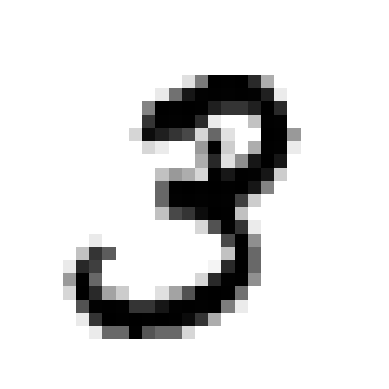

In [7]:
plt.imshow(x_train[1], cmap="binary")
plt.axis('off')
plt.show()

In [8]:
y_train[1]

3

## Build the Network

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


d:\Dev\Machine_Learning\tackleml\env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

## Compile the Model

In [11]:
# Cross entropy loss function is an optimization function 
# which is used in case of training a classification model 
# which classifies the data by predicting the probability 
# of whether the data belongs to one class or the other class
loss_fn = keras.losses.SparseCategoricalCrossentropy()

In [12]:
model.compile(
    loss=loss_fn, # loss function to minimize
    optimizer=keras.optimizers.SGD(learning_rate=1e-3), # Optimizer
    metrics=[keras.metrics.SparseCategoricalAccuracy()] # List of metrics to monitor
)

## Train the model

In [13]:
history = model.fit(
    x_train, 
    y_train, 
    epochs=1, 
    validation_data=(x_val, y_val))

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 2.0532 - sparse_categorical_accuracy: 0.3726 - val_loss: 1.1917 - val_sparse_categorical_accuracy: 0.7746


In [14]:
print(history.history)

{'loss': [1.752942442893982], 'sparse_categorical_accuracy': [0.5624545216560364], 'val_loss': [1.1916835308074951], 'val_sparse_categorical_accuracy': [0.7746000289916992]}


In [15]:
results = model.evaluate(x_test, y_test)
print("test loss, test acc:", results)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2495 - sparse_categorical_accuracy: 0.7420
test loss, test acc: [1.1765875816345215, 0.7757999897003174]


## Functions for model code reuse

In [16]:
def get_precompiled_model():
    model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
    ])
    return model

def get_compiled_model(loss_function=None, optimizer=None, learning_rate=1e-3):
    model = get_precompiled_model()

    if loss_function is None:
        loss_function = keras.losses.SparseCategoricalCrossentropy()

    if optimizer is None:
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate)

    model.compile(
        loss=loss_function, # loss function to minimize
        optimizer=optimizer, # Optimizer
        metrics=["accuracy"] # List of metrics to monitor
    )
    return model
    
def evaluate_model(model, x_test, y_test):
    results = model.evaluate(x_test, y_test)
    print("test loss, test acc:", results)


In [17]:
model = get_compiled_model()
history = model.fit(
    x_train, 
    y_train, 
    epochs=1, 
    validation_data=(x_val, y_val))

evaluate_model(model=model, x_test=x_test, y_test=y_test)

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3641 - loss: 2.0188 - val_accuracy: 0.7450 - val_loss: 1.2013
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - accuracy: 0.7264 - loss: 1.2622
test loss, test acc: [1.1931126117706299, 0.7494000196456909]


## Increasing epochs

In [18]:
history = model.fit(
    x_train,
    y_train,
    epochs=100,
    validation_data=(x_val, y_val)
)
evaluate_model(model=model, x_test=x_test, y_test=y_test)

Epoch 1/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7688 - loss: 1.0540 - val_accuracy: 0.8328 - val_loss: 0.7112
Epoch 2/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8364 - loss: 0.6776 - val_accuracy: 0.8642 - val_loss: 0.5368
Epoch 3/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8651 - loss: 0.5332 - val_accuracy: 0.8846 - val_loss: 0.4521
Epoch 4/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8800 - loss: 0.4579 - val_accuracy: 0.8950 - val_loss: 0.4014
Epoch 5/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8902 - loss: 0.4115 - val_accuracy: 0.9006 - val_loss: 0.3689
Epoch 6/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8936 - loss: 0.3862 - val_accuracy: 0.9070 - val_loss: 0.3448
Epoch 7/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9005 - loss: 0.3621 - val_accuracy: 0.9116 - val_loss: 0.3278
Epoch 8/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9056 - loss: 0

## Using learning rate schedules

In [19]:
initial_learning_rate = 1e-3
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)

optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)

In [20]:
model = get_compiled_model(optimizer=optimizer)
history = model.fit(
    x_train, 
    y_train, 
    epochs=1, 
    validation_data=(x_val, y_val))

evaluate_model(model=model, x_test=x_test, y_test=y_test)

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3540 - loss: 2.0569 - val_accuracy: 0.7610 - val_loss: 1.2402
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - accuracy: 0.7375 - loss: 1.3019
test loss, test acc: [1.2313741445541382, 0.7645999789237976]


In [21]:
optimizer = keras.optimizers.SGD(learning_rate=initial_learning_rate)
model = get_compiled_model(optimizer=optimizer)
history = model.fit(
    x_train, 
    y_train, 
    epochs=100, 
    validation_data=(x_val, y_val))

evaluate_model(model=model, x_test=x_test, y_test=y_test)

Epoch 1/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3672 - loss: 2.0342 - val_accuracy: 0.7836 - val_loss: 1.1247
Epoch 2/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8091 - loss: 0.9697 - val_accuracy: 0.8574 - val_loss: 0.6427
Epoch 3/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8551 - loss: 0.6128 - val_accuracy: 0.8776 - val_loss: 0.4945
Epoch 4/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8731 - loss: 0.4999 - val_accuracy: 0.8918 - val_loss: 0.4253
Epoch 5/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8839 - loss: 0.4398 - val_accuracy: 0.9024 - val_loss: 0.3824
Epoch 6/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8943 - loss: 0.3914 - val_accuracy: 0.9072 - val_loss: 0.3547
Epoch 7/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9000 - loss: 0.3696 - val_accuracy: 0.9114 - val_loss: 0.3338
Epoch 8/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9034 - loss: 0

## From Hands On Machine Learning

In [22]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        print(type(self.model.optimizer.learning_rate))
        print(type(self.model.optimizer.learning_rate * self.factor))
        self.model.optimizer.learning_rate.assign(self.model.optimizer.learning_rate * self.factor)

In [23]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [24]:
model = get_compiled_model(learning_rate=1e-3)
expon_lr = ExponentialLearningRate(factor=1.005)

In [25]:
history = model.fit(
    x_train, 
    y_train, 
    epochs=1,
    validation_data=(x_val, y_val),
    callbacks=[expon_lr]
)

<class 'keras.src.backend.tensorflow.core.Variable'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
   1/1719 ━━━━━━━━━━━━━━━━━━━━ 9:22 327ms/step - accuracy: 0.1562 - loss: 2.2900<class 'keras.src.backend.tensorflow.core.Variable'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'keras.src.backend.tensorflow.core.Variable'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'keras.src.backend.tensorflow.core.Variable'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'keras.src.backend.tensorflow.core.Variable'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'keras.src.backend.tensorflow.core.Variable'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'keras.src.backend.tensorflow.core.Variable'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'keras.src.backend.tensorflow.core.Variable'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'keras.src.backend.tensorflow.core.Variable'>
<class 'ten

Text(0, 0.5, 'Loss')

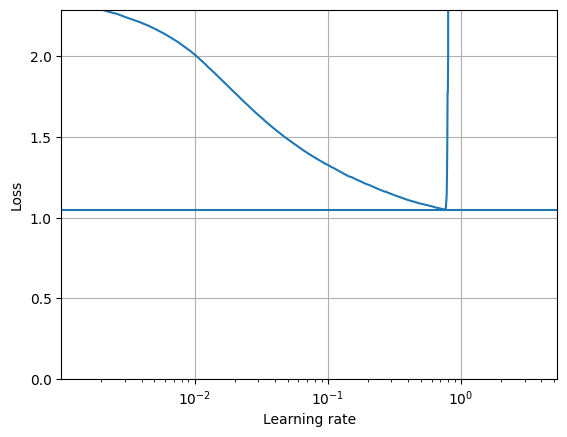

In [26]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [27]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [28]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.keras", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [29]:
optimizer=keras.optimizers.SGD(learning_rate=3e-1)
model = get_compiled_model(optimizer=optimizer)

history = model.fit(x_train, y_train, epochs=100,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

evaluate_model(model=model, x_test=x_test, y_test=y_test)

Epoch 1/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8658 - loss: 0.4195 - val_accuracy: 0.9684 - val_loss: 0.1064
Epoch 2/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9708 - loss: 0.0989 - val_accuracy: 0.9760 - val_loss: 0.0855
Epoch 3/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9815 - loss: 0.0618 - val_accuracy: 0.9766 - val_loss: 0.0863
Epoch 4/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9860 - loss: 0.0459 - val_accuracy: 0.9782 - val_loss: 0.0874
Epoch 5/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9896 - loss: 0.0320 - val_accuracy: 0.9772 - val_loss: 0.0882
Epoch 6/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9899 - loss: 0.0302 - val_accuracy: 0.9792 - val_loss: 0.0817
Epoch 7/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9923 - loss: 0.0228 - val_accuracy: 0.9752 - val_loss: 0.1103
Epoch 8/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9918 - loss: 0

98% accuracy